In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

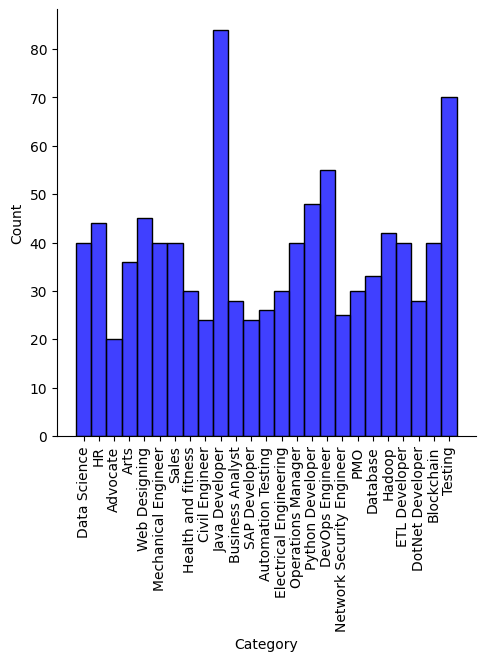

In [ ]:
sns.displot(df['Category'],color='Blue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
cleanResume("my website is like this http://helloworld and access it")

'my website is like this and a ess it'

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Category'])

LabelEncoder()

In [ ]:
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

In [ ]:
print(requiredText)

  (0, 7337)	0.07793683691598892
  (0, 7325)	0.013777197763511152
  (0, 7272)	0.015627656732497608
  (0, 7268)	0.08210033175748493
  (0, 7267)	0.04530355352706441
  (0, 7266)	0.07365192031891578
  (0, 7124)	0.09060710705412882
  (0, 7111)	0.03210060782250888
  (0, 7042)	0.035643114822349116
  (0, 7038)	0.07919611392327797
  (0, 7025)	0.01507429592816611
  (0, 7001)	0.04530355352706441
  (0, 6975)	0.014498500407728567
  (0, 6971)	0.0552933422435761
  (0, 6969)	0.018466499373667587
  (0, 6964)	0.02570734972696293
  (0, 6935)	0.04105016587874247
  (0, 6910)	0.02108815173855525
  (0, 6909)	0.02280552444622189
  (0, 6827)	0.04530355352706441
  (0, 6806)	0.04530355352706441
  (0, 6722)	0.18223987213348936
  (0, 6721)	0.06348530189807601
  (0, 6720)	0.09070978155105364
  (0, 6681)	0.034048142194656
  :	:
  (961, 1599)	0.04841247730200318
  (961, 1408)	0.014269531778824876
  (961, 1361)	0.05448244426640684
  (961, 1297)	0.07186693509860675
  (961, 1203)	0.06885806758426272
  (961, 1118)	0.08296

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(769, 7351)

In [ ]:
X_test.shape

(193, 7351)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [ ]:
myresume = """Sarah Smith is an experienced DevOps Engineer with a passion for streamlining software development and deployment processes. With over 7 years of professional experience, Sarah has honed her skills in automating, optimizing, and securing software pipelines. She can be reached at sarah.smith@email.com or by phone at +1 (555) 123-4567. Sarah holds a Bachelor of Science in Computer Engineering from the University of Technology.

Sarah's technical expertise includes proficiency in a wide range of DevOps tools and practices. She is well-versed in continuous integration and continuous delivery (CI/CD) pipelines, containerization with Docker and Kubernetes, configuration management using tools like Ansible, infrastructure as code (IaC) with Terraform, and cloud platforms such as AWS and Azure. She is also experienced in version control systems like Git and has a deep understanding of scripting and automation with languages like Python and Bash.

In her previous role as a DevOps Engineer at TechOps Solutions Inc., Sarah played a pivotal role in optimizing software development workflows. She implemented and maintained CI/CD pipelines, ensuring rapid and reliable software releases. She also managed and orchestrated containerized applications using Docker and Kubernetes, contributing to improved scalability and resource utilization. Sarah has a strong background in infrastructure management, having designed and provisioned cloud resources on AWS, Azure, and GCP using Terraform.

Sarah's contributions to security are noteworthy, as she has implemented robust security measures within CI/CD pipelines, ensuring the integrity and security of software releases. She actively collaborated with development and operations teams, bridging the gap between these traditionally separate domains to foster a culture of collaboration and efficiency.

Throughout her career, Sarah has earned certifications such as AWS Certified DevOps Engineer and Kubernetes Certified Administrator, further validating her expertise in the DevOps field. She is enthusiastic about sharing knowledge and has conducted internal training sessions to educate teams on best practices in DevOps.

Sarah has also been involved in open-source projects, contributing to the DevOps community. She values transparency and has made her scripts and tools available on her GitHub profile at https://github.com/sarahdevops.

In summary, Sarah Smith is a highly skilled and dedicated DevOps Engineer who excels in automating, optimizing, and securing software pipelines. Her experience, technical proficiency, and commitment to collaboration make her a valuable asset to any organization seeking to enhance its DevOps practices.
"""

In [ ]:
# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

In [ ]:
# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: DevOps Engineer
8
